In [6]:
import numpy as np
import pandas as pd
import glob
import matplotlib as mpl
from matplotlib import mlab, cm
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.lines import Line2D      
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


import morphoGrid as morph
# from scripts import morphoGrid_sl as morph_sl
import morphoGrid_noflex as morphnf# from scripts import morphoGrid_sl as morph_sl


In [7]:
##################
#Sea-level curves#
################## 
SL_0=pd.read_csv('../../2_model_running/data/SL0.csv', sep=' ', header=None)
SL_GH=pd.read_csv('../../2_model_running/data/SL_GH.csv', sep=' ',header=None)
SL_IH=pd.read_csv('../../2_model_running/data/SL_IH.csv', sep=' ',header=None)
sea_level_v1= [SL_0, SL_GH, SL_IH]


######################
#Simulation's results#
######################
sim=['/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL0_Te50/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_GH_Te50/h5',
     '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_IH_Te50/h5']
sim_nf=['/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL0_NoFlex/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_GH_NoFlex/h5',
     '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_IH_NoFlex/h5']

################################
#Extracted simulation's results#
################################

profile_SL0_flex=pd.read_csv('./extracted_results/IH_GH/profile_SL0_flex.csv', sep=',',header=None)
profile_GH_flex=pd.read_csv('./extracted_results/IH_GH/profile_GH_flex.csv', sep=',',header=None)
profile_IH_flex=pd.read_csv('./extracted_results/IH_GH/profile_IH_flex.csv', sep=',',header=None)


profile_SL0_nf=pd.read_csv('./extracted_results/IH_GH/profile_SL0_noflex.csv', sep=',',header=None)
profile_GH_nf=pd.read_csv('./extracted_results/IH_GH/profile_GH_noflex.csv', sep=',',header=None)
profile_IH_nf=pd.read_csv('./extracted_results/IH_GH/profile_IH_noflex.csv', sep=',',header=None)

profiles_flex=[profile_SL0_flex,profile_GH_flex, profile_IH_flex]
profiles_nflex=[profile_SL0_nf, profile_GH_nf, profile_IH_nf]


In [8]:
def normalized(x, xmin, xmax):
    try:
        normalized = (x - xmin) / (xmax - xmin)
    except ZeroDivisionError:
        percentage = float('inf')
    return normalized


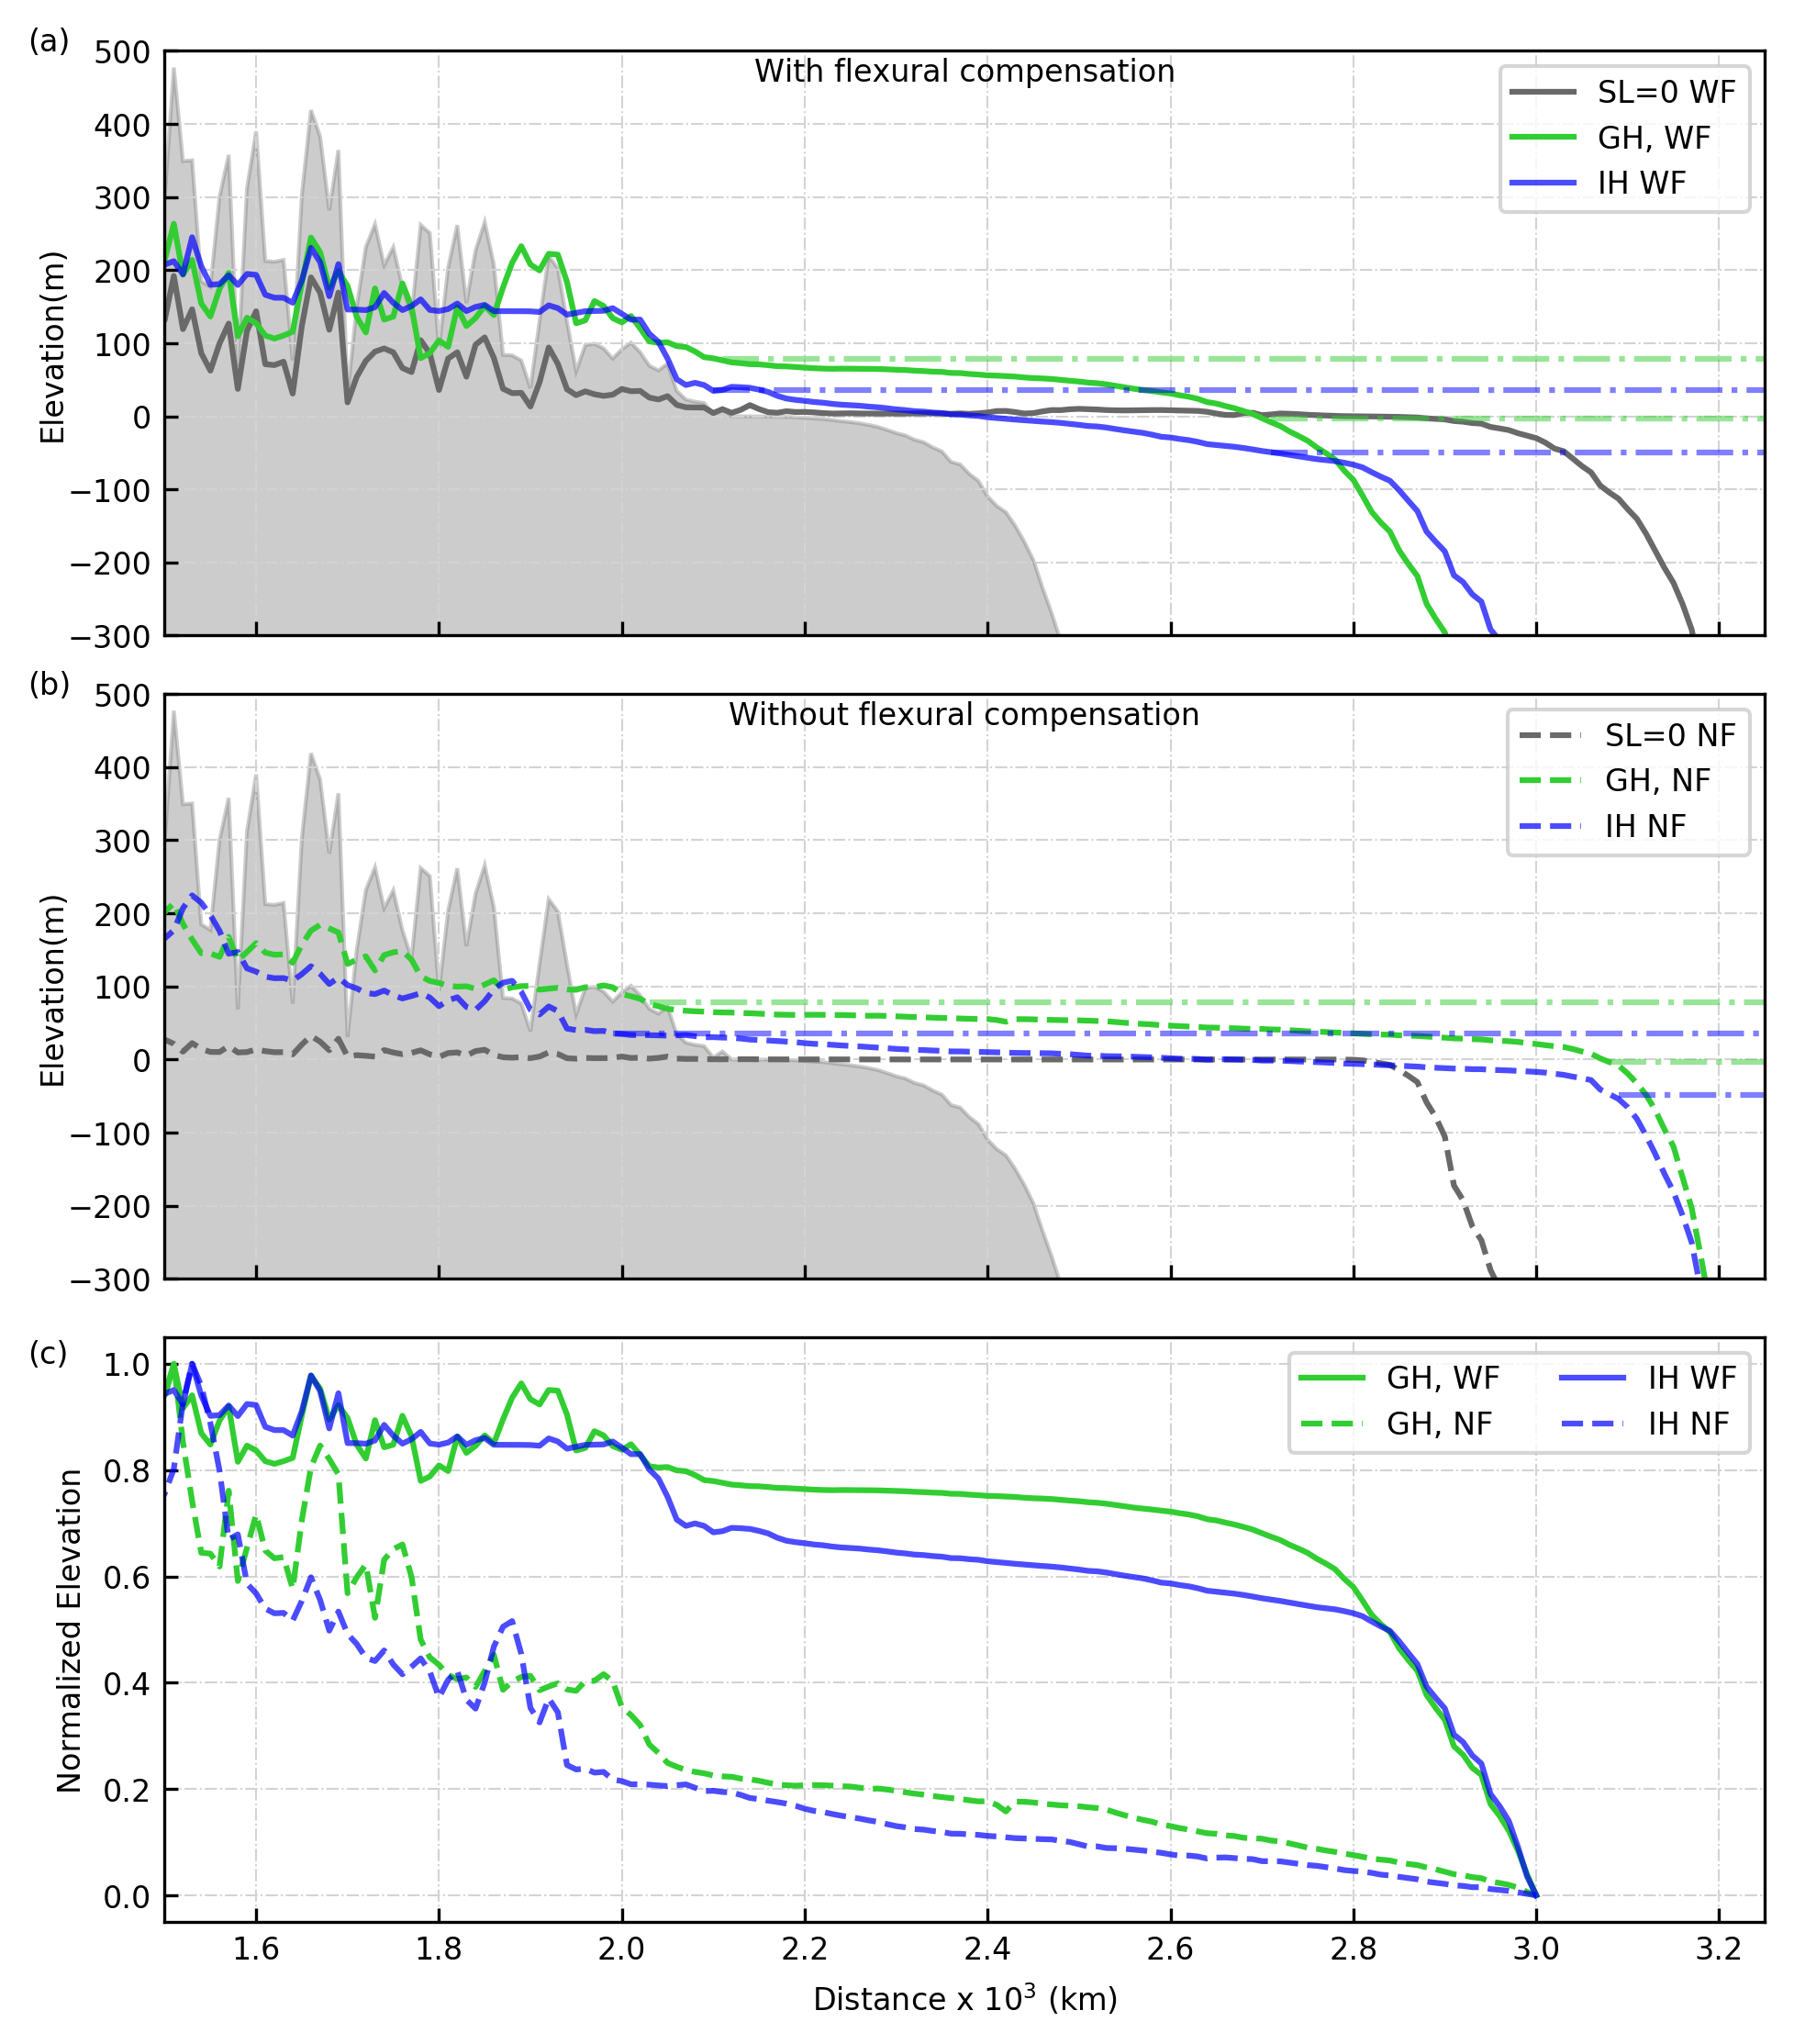

In [9]:
#Flex compensation, without compensation, normalized
################
#submitted plot#
################
#Adding final cross-section at the bottom
nrows=3; ncols=1
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=((19.05/2.54), 9), sharex=True,  dpi=300) 

plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=8)

#################
#Defining colors#
#################

GH_color='limegreen'# GH_color=(0,1,0,0.7)
IH_color=(0,0,1,0.7)
color_marker=['dimgrey',  GH_color, IH_color]
alpha=.8
labels=['SL=0','GH', 'IH']
ub=150 #Upstream boundary
db=350 #Downstream boundary
xs_i=100#index at which the cross-section is plotted
initial_step=19
final_step=119

labels_WF=['SL=0 WF','GH, WF', 'IH WF']
labels_NF=['SL=0 NF', 'GH, NF', 'IH NF']
################
#First row plot#
################
#Initial cross-section flexural cases
morpho = morph.morphoGrid(sim[0],dx=1e4)
morpho.loadHDF5(timestep=initial_step)
axes.flatten()[0].fill(np.append(min(morpho.x[xs_i,ub:db]/1e6), morpho.x[xs_i,ub:db]/1e6),
         np.append(min(morpho.z[xs_i,ub:db]), morpho.z[xs_i,ub:db]),alpha=0.4,  color='grey') 

#Cross-section final timestep
for i in np.arange(0,len(sim),1):                 
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=final_step)
        axes.flatten()[0].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color_marker[i], label=labels_WF[i])
        if i >=1:
            axes.flatten()[0].plot([morpho.x[xs_i, np.int(np.argwhere(morpho.z[xs_i,:]<min(sea_level_v1[i][1]))[0])]/1e6, morpho.x[xs_i, db]/1e6],
                              [min(sea_level_v1[i][1]), min(sea_level_v1[i][1])], linestyle='-.', color=color_marker[i], alpha=0.5)
            axes.flatten()[0].plot([morpho.x[xs_i, np.int(np.argwhere(morpho.z[xs_i,:]<max(sea_level_v1[i][1]))[0])]/1e6, morpho.x[xs_i, db]/1e6],
                              [max(sea_level_v1[i][1]), max(sea_level_v1[i][1])], linestyle='-.', color=color_marker[i], alpha=0.5)

            
#################         
#Second row plot#
#################
#Initial cross-section non-flexural cases
morpho = morphnf.morphoGrid_noflex(sim[0],dx=1e4)
morpho.loadHDF5(timestep=initial_step)
axes.flatten()[1].fill(np.append(min(morpho.x[xs_i,ub:db]/1e6), morpho.x[xs_i,ub:db]/1e6),
         np.append(min(morpho.z[xs_i,ub:db]), morpho.z[xs_i,ub:db]),alpha=0.4,  color='grey')
#Cross-section final timestep
for i in np.arange(0,len(sim),1): 
        morpho = morphnf.morphoGrid_noflex(sim_nf[i],dx=1e4)
        morpho.loadHDF5(timestep=final_step)
        axes.flatten()[1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color_marker[i], linestyle='--', label=labels_NF[i])
        if i >=1:
            axes.flatten()[1].plot([morpho.x[xs_i, np.int(np.argwhere(morpho.z[xs_i,:]<min(sea_level_v1[i][1]))[0])]/1e6, morpho.x[xs_i, db]/1e6],
                              [min(sea_level_v1[i][1]), min(sea_level_v1[i][1])], linestyle='-.', color=color_marker[i], alpha=0.5)
            axes.flatten()[1].plot([morpho.x[xs_i, np.int(np.argwhere(morpho.z[xs_i,:]<max(sea_level_v1[i][1]))[0])]/1e6, morpho.x[xs_i, db]/1e6],
                              [max(sea_level_v1[i][1]), max(sea_level_v1[i][1])], linestyle='-.', color=color_marker[i], alpha=0.5)

#             axes.flatten()[1].plot(3.2, max(sea_level_v1[i][1]) , "v",color=color_marker[i], alpha=0.5)
############
#Normalized#
############
ub=152

for i in np.arange(1,3,1):
    axes.flatten()[2].plot(profiles_flex[i][0][0:ub]/1e6, 
                 normalized(profiles_flex[i][1][0:ub], 
                            min(profiles_flex[i][1][0:ub]),
                            max(profiles_flex[i][1][0:ub])), 
                 color=color_marker[i], label=labels_WF[i])
    axes.flatten()[2].plot(profiles_flex[i][0][0:ub]/1e6, 
                 normalized(profiles_nflex[i][1][0:ub],
                            min(profiles_nflex[i][1][0:ub]),
                            max(profiles_nflex[i][1][0:ub])), 
                 color=color_marker[i], linestyle='--', label=labels_NF[i])

###########
#Formating#
###########
abc=['(a)', '(b)', '(c)']
yabc=[500,500,1]

for i in np.arange(0,3,1):
    axes.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    axes.flatten()[i].tick_params(direction= 'in')
    axes.flatten()[i].text(1.35, yabc[i], abc[i])
    if i==0:
        axes.flatten()[i].set_xlim(1.5, 3.25)
        axes.flatten()[i].set_ylabel('Elevation(m)',  labelpad=-0.1)
        axes.flatten()[i].set_title('With flexural compensation', pad=-8, fontsize=8)

    if i==1:
        axes.flatten()[i].set_ylabel('Elevation(m)',  labelpad=-0.1) 
        axes.flatten()[i].set_title('Without flexural compensation', pad=-8, fontsize=8)

    if i<=1:
        axes.flatten()[i].set_ylim(-300,500)

        axes.flatten()[i].legend()
    if i==2:
        axes.flatten()[i].legend(ncol=2)
        axes.flatten()[i].set_ylabel('Normalized Elevation')  
        axes.flatten()[i].set_xlabel('Distance x $10^3$ (km)')

fig.subplots_adjust(hspace=0.1)
# fig.savefig('./images/Fig_downdip_section_finalstage.jpg', bbox_inches='tight', dpi=300)   

